In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # visualization tool

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/data/btc-pred/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/data/btc-pred/data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv


In [3]:
data = pd.read_csv('/data/btc-pred/data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [5]:
data = data.rename(columns={"Volume_(BTC)": "Volume_BTC", "Volume_(Currency)": "Volume_Currency"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Timestamp        int64  
 1   Open             float64
 2   High             float64
 3   Low              float64
 4   Close            float64
 5   Volume_BTC       float64
 6   Volume_Currency  float64
 7   Weighted_Price   float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [6]:
data.columns= data.columns.str.lower()
data.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume_btc',
       'volume_currency', 'weighted_price'],
      dtype='object')

In [7]:
data.head()

,timestamp,open,high,low,close,volume_btc,volume_currency,weighted_price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data = data.dropna(how='any',axis=0)
data

,timestamp,open,high,low,close,volume_btc,volume_currency,weighted_price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613769 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   timestamp        int64  
 1   open             float64
 2   high             float64
 3   low              float64
 4   close            float64
 5   volume_btc       float64
 6   volume_currency  float64
 7   weighted_price   float64
dtypes: float64(7), int64(1)
memory usage: 248.1 MB


In [10]:
data['period'] = pd.to_datetime(data['timestamp'],unit='s').dt.to_period('M') # monthly period
data = data.drop(["timestamp"],axis=1)   # column drop with column name
data

,open,high,low,close,volume_btc,volume_currency,weighted_price,period
0,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12
478,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12
547,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12
548,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12
1224,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01
...,...,...,...,...,...,...,...,...
4857372,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03
4857373,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03
4857374,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03
4857375,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03


In [11]:
data = data.groupby('period').agg({'weighted_price': ['mean'], 'volume_btc': ['sum'], 'volume_currency': ['sum']})
data.columns = ['weighted_price_mean', 'volume_btc_sum', 'volume_currency_sum']
data.head(10)

"""
grouped_multiple = data.groupby(['period', 'weighted_price']).agg({'volume_btc': ['mean', 'min', 'max']})
grouped_multiple.columns = ['volume_btc_mean', 'volume_btc_min', 'volume_btc_max']
grouped_multiple = grouped_multiple.reset_index()
grouped_multiple
"""

"\ngrouped_multiple = data.groupby(['period', 'weighted_price']).agg({'volume_btc': ['mean', 'min', 'max']})\ngrouped_multiple.columns = ['volume_btc_mean', 'volume_btc_min', 'volume_btc_max']\ngrouped_multiple = grouped_multiple.reset_index()\ngrouped_multiple\n"

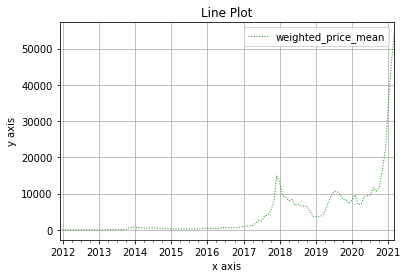

In [12]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
#data.volume_btc_sum.plot(color = 'g',label = 'volume_btc_sum',linewidth=1, alpha = 0.5,grid = True,linestyle = ':')
#data.volume_currency_sum.plot(color = 'r',label = 'volume_currency_sum',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
data.weighted_price_mean.plot(kind = 'line', color = 'g',label = 'weighted_price_mean',linewidth=1,alpha = 0.9,grid = True,linestyle = ':')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

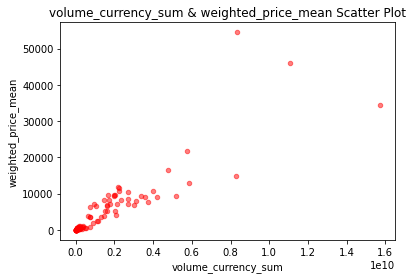

In [13]:
# Scatter Plot 
# as you can in the Scatter Plot, we can say when volume currency increase, weighted price also increse

# x = volume_currency_sum, y = weighted_price_mean
data.plot(kind='scatter', x='volume_currency_sum', y='weighted_price_mean',alpha = 0.5,color = 'red')
plt.xlabel('volume_currency_sum')  # label = name of label
plt.ylabel('weighted_price_mean') 
plt.title('volume_currency_sum & weighted_price_mean Scatter Plot')            # title = title of plot
plt.show()

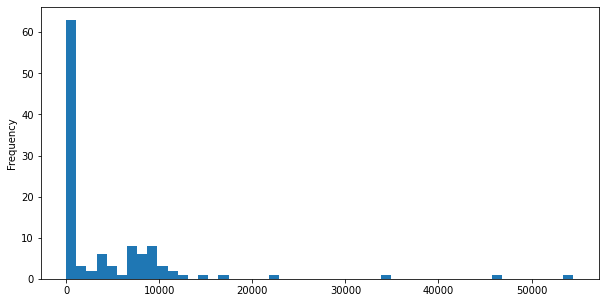

In [14]:
# Histogram
# bins = number of weighted_price_mean in figure 
data.weighted_price_mean.plot(kind = 'hist',bins = 50,figsize = (10,5))
plt.show()

In [15]:
#data filtering for price > 11K

x = data['weighted_price_mean']>11000
data[x]


,weighted_price_mean,volume_btc_sum,volume_currency_sum
period,,,
2017-12,14840.894239,562151.768546,8.303392e+09
2018-01,12894.950040,465109.102368,5.840884e+09
2020-08,11637.963222,194201.641404,2.258492e+09
2020-10,11844.141987,182294.479309,2.210740e+09
2020-11,16535.990325,288240.284237,4.779719e+09
2020-12,21811.782847,256185.683590,5.765681e+09
2021-01,34552.337249,457460.829786,1.572795e+10
2021-02,46075.783298,240350.583324,1.105483e+10
2021-03,54499.282182,153306.855508,8.336742e+09
